In [1]:
import pandas as pd
import json

d4j_perturbed_bugs = { "Chart-26", "Cli-1" , "Closure-106" , "Codec-1" , 
                  "Collections-25" , "Compress-1" , "Csv-1" , "Gson-1" ,
                  "JacksonCore-1" , "JacksonDatabind-1" , "JacksonXml-1" ,
                  "Jsoup-1" , "JxPath-1" , "Lang-65" , "Math-106" ,
                  "Mockito-28" , "Time-27"
                 }

bears_perturbed_bugs = {"Bears-140","Bears-1","Bears-194","Bears-196","Bears-213",
                        "Bears-205","Bears-232","Bears-204","Bears-98","Bears-251",
                        "Bears-153","Bears-180","Bears-165","Bears-207","Bears-198",
                        "Bears-186","Bears-210","Bears-190","Bears-241","Bears-166",
                        "Bears-199","Bears-200","Bears-234","Bears-240","Bears-250",
                        "Bears-223","Bears-144","Bears-212","Bears-214","Bears-169",
                        "Bears-242","Bears-246","Bears-156","Bears-84","Bears-238",
                        "Bears-157","Bears-202","Bears-231","Bears-243","Bears-247",
                        "Bears-233","Bears-239","Bears-220","Bears-245","Bears-158",
                        "Bears-209","Bears-188","Bears-229","Bears-193","Bears-230",
                        "Bears-211","Bears-221","Bears-222","Bears-228","Bears-248",
                        "Bears-201","Bears-224","Bears-176","Bears-27","Bears-227",
                        "Bears-249","Bears-142","Bears-225","Bears-159","Bears-170",
                        "Bears-197","Bears-226","Bears-184","Bears-177","Bears-149",
                        "Bears-206","Bears-155"}

def read_eval_d4j(path):
    df = pd.read_json(path, orient="index")
    df = df[~df.index.isin(d4j_perturbed_bugs)]
    return df

def read_eval_bears(path):
    df = pd.read_json(path, orient="index")
    df = df[~df.index.isin(bears_perturbed_bugs)]
    return df

In [2]:
def get_number_compile(df, k):
    count = 0
    all_count = 0
    for index, row in df.iterrows():
        for fix in row[0]:
            if int(fix["k"]) > k:
                continue
            all_count += 1
            if fix["compile_exec"] and fix["compile_pass"]:
                count += 1
    return "%d / %d (%.2f%%)" % (count, all_count, count/all_count*100)

In [3]:
def get_number_fixed(df, k):
    count = 0
    for index, row in df.iterrows():
        all_fixed = []
        for hunk in row.hunks:
            fixed = False
            for i, fix in enumerate(row.hunks[hunk]["patches"]):
                if int(fix["k"]) > k:
                    continue
                if fix["identical"]:
                    fixed = True
                    break
            all_fixed += [fixed]
        if True in all_fixed and not False in all_fixed:
            count += 1
    return "%d / %d (%.2f%%)" % (count, len(df), count/len(df)*100)

In [4]:
def get_fixed(df):
    result = []
    for index, row in df.iterrows():
        all_fixed = []
        for hunk in row.hunks:
            fixed = False
            for i, fix in enumerate(row.hunks[hunk]["patches"]):
                if fix["identical"]:
                    fixed = True
                    break
            all_fixed += [fixed]
        if True in all_fixed and not False in all_fixed:
            result += [index]
    return result

In [5]:
def get_table_entry(beam_width, ex, round_, 
                    cb_1, cb_5, cb_10, cb_25, cb_50, cb_100, 
                    tb_1, tb_5, tb_10, tb_25, tb_50, tb_100,
                    cd_1, cd_5, cd_10, cd_25, cd_50, cd_100,
                    td_1, td_5, td_10, td_25, td_50, td_100):
    return {"Hyper Parameters": {
                "" :   { "Beam Width" : beam_width }
            },
            "Training": {
                "Experiment" : { "" : ex },
                "Round" : { "" : round_ }
            },
            "Testing":{
                "Bears Compile" :
                { "Top-1" : cb_1 , "Top-5" : cb_5 , "Top-10" : cb_10 , "Top-25" : cb_25, "Top-50" : cb_50 , "Top-100" : cb_100 },
                "Bears Test Pass" :
                { "Top-1" : tb_1 , "Top-5" : tb_5 , "Top-10" : tb_10 , "Top-25" : tb_25, "Top-50" : tb_50 , "Top-100" : tb_100 },
                "Defects4J Compile" :
                { "Top-1" : cd_1 , "Top-5" : cd_5 , "Top-10" : cd_10 , "Top-25" : cd_25, "Top-50" : cd_50 , "Top-100" : cd_100 },
                "Defects4J Tests Pass" :
                { "Top-1" : td_1 , "Top-5" : td_5 , "Top-10" : td_10 , "Top-25" : td_25, "Top-50" : td_50 , "Top-100" : td_100 },
            }
       }

{'Jsoup', 'Csv', 'Codec', ' Jsoup', 'Chart', ' Closure', 'Time', 'JacksonCore', 'Lang', 'Closure', 'Mockito', 'JacksonDatabind', 'Math', 'Cli', 'JxPath', 'Compress', 'Collections', 'Gson', ' Math'}
{'Chart': {1, 4, 7, 8, 9, 11, 14, 20, 24}, 'Collections': {26}, 'Jsoup': {41, 43, 18, 85, 55, 24, 62}, 'Closure': {6, 13, 18, 30, 31, 38, 40, 168, 46, 57, 62, 70, 73, 86, 92, 102, 104, 113, 118, 126}, 'Cli': {5, 8, 17, 18, 25, 27, 28}, 'Math': {32, 98, 5, 70, 72, 104, 75, 77, 46, 79, 80, 49, 50, 82, 85, 22, 57, 30}, 'Lang': {33, 4, 6, 8, 10, 43, 51, 21, 55, 57, 26, 59}, 'Mockito': {34, 5, 8, 11, 26, 29}, 'Time': {19, 4}, 'JxPath': {10}, ' Math': {41}, 'JacksonDatabind': {99, 76, 46, 47, 49, 17, 57, 27}, 'Csv': {9, 11}, 'Codec': {17, 2, 3, 7}, 'Compress': {33, 4, 14, 19, 27, 30, 31}, 'JacksonCore': {25, 19, 5}, 'Gson': {6}, ' Jsoup': {49, 47}, ' Closure': {11}}
Fixed by SelfAPR only: {'Chart-20', 'Collections-26', 'Jsoup-41', 'Closure-118', 'Cli-28', 'Closure-18', 'Lang-33', 'Mockito-34', 'Ti

,Perturb Actions,Repair Actions,No. bugs,Repaired Bugs,Intersection,Intersection Repaired Bugs
0,P1 Replace type,Replace type,3,"Math-30,Math-79,Math-57",3,"{Math-30, Math-79, Math-57}"
1,P2 Replace operator,Replace operator,11,"Chart-1,Closure-62,Closure-73,Compress-19,Jack...",2,"{Chart-1, JacksonCore-25}"
2,P3 replace literal,Replace literal,14,"Closure-168,Closure-70,Closure-86,Codec-7,Coll...",3,"{Closure-86, Math-22, Closure-70}"
3,P4 replace constructor,replace constructor,1,Lang-26,0,{}
4,P5 replace variable,Replace variable,14,"Chart-11,Chart-20,Chart-7,Chart-8,Time-4,Jacks...",1,{Math-98}
5,P6 replace condition expression,Replace condition expression,16,"Closure-113,Closure-18,Closure-57,Mockito-29,M...",2,"{Math-46, Closure-113}"
6,P7 replace invocation,replace invocation,11,"Closure-30,Closure-92,Codec-17,Lang-4,Math-75,...",3,"{Codec-17, Math-75, Closure-92}"
7,P8 compound statement,compound statement,3,"Cli-18, Math-41,Mockito-11",0,{}
8,P9 replace with similarity,replace with similarity,5,"Mockito-5,Cli-28,Jsoup-41,Jsoup-85,Csv-11",0,{}
9,P10 move statement,move statement,2,"Closure-13, Jsoup-49",0,{}


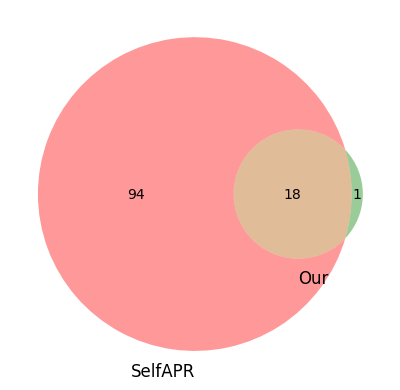

In [6]:
#Import libraries
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted, venn3
from matplotlib import pyplot as plt

def compare_selfapr(selfapr_path, path):
    our_df = read_eval_d4j(path)
    our_fixed = set(get_fixed(our_df))
    selfapr_df = pd.read_csv(selfapr_path, delimiter=';')
    selfapr_fixed = set()
    
    intersection = []
    intersection_list = []
    for index, row in selfapr_df.iterrows():
        new_selfapr_fixes = set(filter(lambda x: x != "", row["Repaired Bugs"].split(",")))
        inter = new_selfapr_fixes.intersection(our_fixed)
        intersection += [len(inter)]
        intersection_list += [inter]
        selfapr_fixed.update(new_selfapr_fixes)
    selfapr_df["Intersection"] = intersection
    selfapr_df["Intersection Repaired Bugs"] = intersection_list
    
    venn2([selfapr_fixed, our_fixed], ("SelfAPR", "Our"))
    
    # Compute SelfAPR bugs for reproduction
    pids = set()
    bugs = {}
    for x in selfapr_fixed:
        pid, bid = x.split("-")[0], int(x.split("-")[1])
        pids.add(pid)
        if pid in bugs:
            bugs[pid].add(bid)
        else:
            bugs[pid] = set([bid])
    
    print(pids)
    print(bugs)
    
    print("Fixed by SelfAPR only: " + str(selfapr_fixed - our_fixed))
    print("Fixed by both: " + str(selfapr_fixed.intersection(our_fixed)))
    print("Fixed by us only: " + str(our_fixed - selfapr_fixed))
    return selfapr_df

compare_selfapr("selfapr_fixed.csv", "/mnt/data/andre/mscthesis/experiments/defects4j_selfapr/round0/fixer/eval_defects4j_bw_100.json")

In [7]:
from os.path import exists

entries = []
top_k = [1, 5, 10, 25, 50, 100]
experiments = ["defects4j_buglab", "defects4j_selfapr", "bears_buglab", "bears_selfapr"]
rounds = ["round0", "round1-nocritic", "round1-compiler", "round1-tests"]

for ex in experiments:
    for ro in rounds:
        ro_path = ro if ro == "round0" else "%s/part2" % ro
        bears_path_comp = "/mnt/data/andre/mscthesis/experiments/%s/%s/fixer/eval_compilability_bears_bw_100.json" % (ex, ro_path)
        bears_path = "/mnt/data/andre/mscthesis/experiments/%s/%s/fixer/eval_bears_bw_100.json" % (ex, ro_path)
        d4j_path_comp = "/mnt/data/andre/mscthesis/experiments/%s/%s/fixer/eval_compilability_defects4j_bw_100.json" % (ex, ro_path)
        d4j_path = "/mnt/data/andre/mscthesis/experiments/%s/%s/fixer/eval_defects4j_bw_100.json" % (ex, ro_path)
        
        read_eval = read_eval_d4j if "defects4j" in ex else read_eval_bears
        cb = [get_number_compile(read_eval(bears_path_comp), k) for k in top_k] if exists(bears_path_comp) else ["N/A" for _ in top_k]
        tb = [get_number_fixed(read_eval(bears_path), k) for k in top_k] if exists(bears_path) else ["N/A" for _ in top_k]
        cd = [get_number_compile(read_eval(d4j_path_comp), k) for k in top_k] if exists(d4j_path_comp) else ["N/A" for _ in top_k]
        td = [get_number_fixed(read_eval(d4j_path), k) for k in top_k] if exists(d4j_path) else ["N/A" for _ in top_k]
        
        entries += [get_table_entry(100, ex, ro, *cb, *tb, *cd, *td)]

In [8]:
pd.set_option('display.max_columns', 27)
pd.set_option('display.max_rows', 16)
table = pd.json_normalize(data=entries)
table.columns = table.columns.str.split(".").map(tuple)
table

Hyper Parameters           Training                            Testing  \
                            Experiment            Round     Bears Compile   
         Beam Width                                                 Top-1   
0               100   defects4j_buglab           round0  12 / 73 (16.44%)   
1               100   defects4j_buglab  round1-nocritic  14 / 74 (18.92%)   
2               100   defects4j_buglab  round1-compiler  44 / 74 (59.46%)   
3               100   defects4j_buglab     round1-tests  26 / 74 (35.14%)   
4               100  defects4j_selfapr           round0    6 / 74 (8.11%)   
5               100  defects4j_selfapr  round1-nocritic   8 / 74 (10.81%)   
6               100  defects4j_selfapr  round1-compiler  14 / 74 (18.92%)   
7               100  defects4j_selfapr     round1-tests  12 / 74 (16.22%)   
8               100       bears_buglab           round0               N/A   
9               100       bears_buglab  round1-nocritic               N/A   
10              100       bears_buglab  round1-compiler               N/A   
11              100       bears_buglab     round1-tests               N/A   
12              100      bears_selfapr           round0               N/A   
13              100      bears_selfapr  round1-nocritic               N/A   
14              100      bears_selfapr  round1-compiler               N/A   
15              100      bears_selfapr     round1-tests               N/A   

                                                                 \
                                                                  
                 Top-5              Top-10               Top-25   
0     31 / 365 (8.49%)    45 / 730 (6.16%)    84 / 1825 (4.60%)   
1    59 / 370 (15.95%)   99 / 740 (13.38%)  203 / 1850 (10.97%)   
2   123 / 370 (33.24%)  214 / 740 (28.92%)  470 / 1850 (25.41%)   
3    98 / 370 (26.49%)  170 / 740 (22.97%)  392 / 1850 (21.19%)   
4     27 / 370 (7.30%)    46 / 740 (6.22%)    87 / 1850 (4.70%)   
5     29 / 370 (7.84%)    47 / 740 (6.35%)   108 / 1850 (5.84%)   
6    44 / 370 (11.89%)   75 / 740 (10.14%)   149 / 1850 (8.05%)   
7    38 / 370 (10.27%)    62 / 740 (8.38%)   113 / 1850 (6.11%)   
8                  N/A                 N/A                  N/A   
9                  N/A                 N/A                  N/A   
10                 N/A                 N/A                  N/A   
11                 N/A                 N/A                  N/A   
12                 N/A                 N/A                  N/A   
13                 N/A                 N/A                  N/A   
14                 N/A                 N/A                  N/A   
15                 N/A                 N/A                  N/A   

                                                                \
                                               Bears Test Pass   
                 Top-50               Top-100            Top-1   
0    135 / 3650 (3.70%)    306 / 7300 (4.19%)  0 / 250 (0.00%)   
1   371 / 3700 (10.03%)   743 / 7400 (10.04%)  0 / 250 (0.00%)   
2   872 / 3700 (23.57%)  1673 / 7400 (22.61%)  0 / 250 (0.00%)   
3   743 / 3700 (20.08%)  1471 / 7400 (19.88%)  0 / 250 (0.00%)   
4    118 / 3700 (3.19%)    199 / 7400 (2.69%)  0 / 250 (0.00%)   
5    163 / 3700 (4.41%)    264 / 7400 (3.57%)  0 / 250 (0.00%)   
6    230 / 3700 (6.22%)    427 / 7400 (5.77%)  0 / 250 (0.00%)   
7    179 / 3700 (4.84%)    324 / 7400 (4.38%)  0 / 250 (0.00%)   
8                   N/A                   N/A              N/A   
9                   N/A                   N/A              N/A   
10                  N/A                   N/A              N/A   
11                  N/A                   N/A              N/A   
12                  N/A                   N/A  0 / 178 (0.00%)   
13                  N/A                   N/A              N/A   
14                  N/A                   N/A              N/A   
15                  N/A                   N/A              N/A   

          

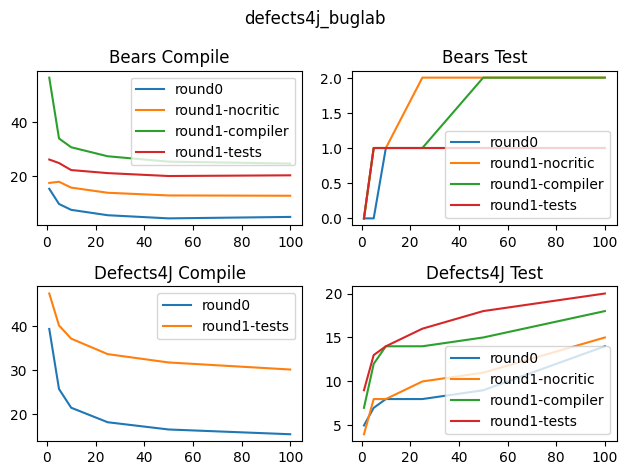

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


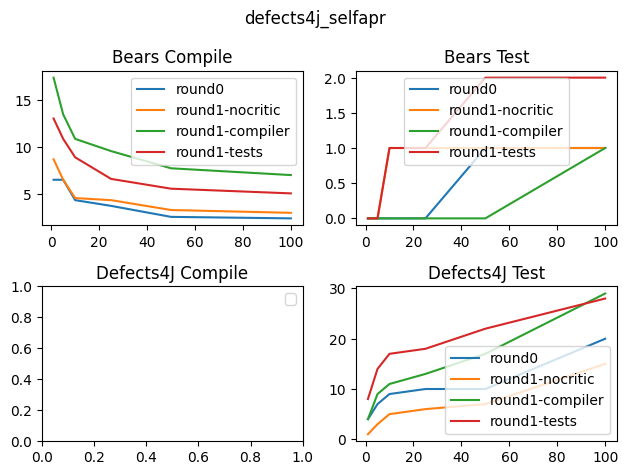

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


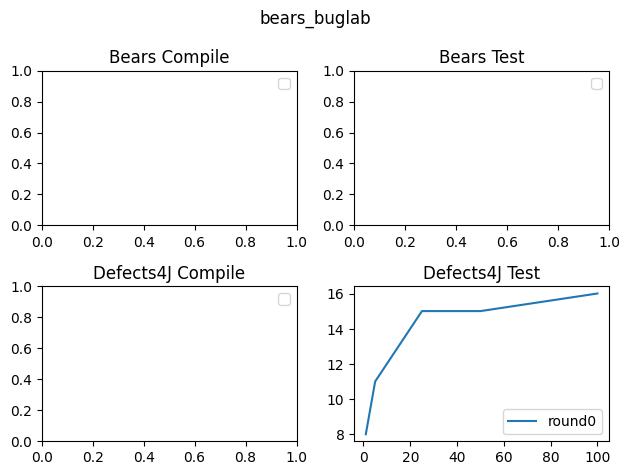

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


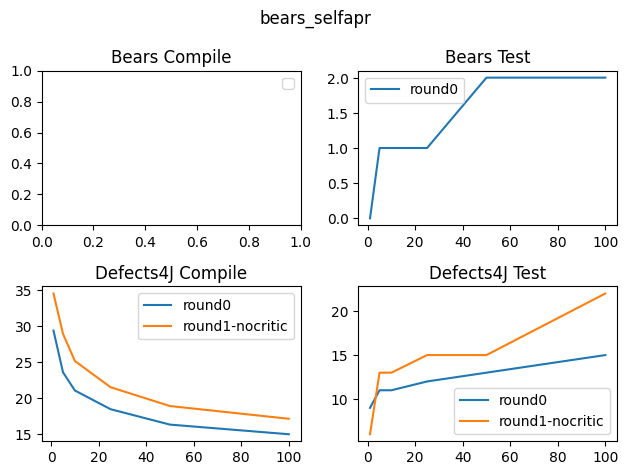

In [9]:
from os.path import exists
from matplotlib import pyplot as plt

entries = []
top_k = [1, 5, 10, 25, 50, 100]
experiments = ["defects4j_buglab", "defects4j_selfapr", "bears_buglab", "bears_selfapr"]
rounds = ["round0", "round1-nocritic", "round1-compiler", "round1-tests"]

for ex in experiments:
    figure, axis = plt.subplots(2, 2)
    axis[0, 0].set_title("Bears Compile")
    axis[0, 1].set_title("Bears Test")
    axis[1, 0].set_title("Defects4J Compile")
    axis[1, 1].set_title("Defects4J Test")

    for ro in rounds:
        ro_path = ro if ro == "round0" else "%s/part2" % ro
        bears_path_comp = "/mnt/data/andre/mscthesis/experiments/%s/%s/fixer/eval_compilability_bears_bw_100.json" % (ex, ro_path)
        bears_path = "/mnt/data/andre/mscthesis/experiments/%s/%s/fixer/eval_bears_bw_100.json" % (ex, ro_path)
        d4j_path_comp = "/mnt/data/andre/mscthesis/experiments/%s/%s/fixer/eval_compilability_defects4j_bw_100.json" % (ex, ro_path)
        d4j_path = "/mnt/data/andre/mscthesis/experiments/%s/%s/fixer/eval_defects4j_bw_100.json" % (ex, ro_path)
        
        if exists(bears_path_comp):
            cb = [float(get_number_compile(read_eval(bears_path_comp), k).split("(")[1].split("%")[0]) for k in top_k]
            axis[0, 0].plot(top_k, cb, label=ro)
        if exists(bears_path):
            tb = [int(get_number_fixed(read_eval(bears_path), k).split("/")[0]) for k in top_k]
            axis[0, 1].plot(top_k, tb, label=ro)
        if exists(d4j_path_comp):
            cb = [float(get_number_compile(read_eval(d4j_path_comp), k).split("(")[1].split("%")[0]) for k in top_k]
            axis[1, 0].plot(top_k, cb, label=ro)
        if exists(d4j_path):
            tb = [int(get_number_fixed(read_eval(d4j_path), k).split("/")[0]) for k in top_k]
            axis[1, 1].plot(top_k, tb, label=ro)
            
    axis[0, 0].legend()
    axis[0, 1].legend()
    axis[1, 0].legend()
    axis[1, 1].legend()
    plt.suptitle(ex)
    figure.tight_layout()
    plt.show()